In [3]:
#importing all the needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Reading the data 


In [6]:
df=pd.read_csv('hotstar.csv')

# Data cleaning, exploratory and analysis

In [7]:
df.head(10)

,hotstar_id,title,description,genre,year,age_rating,running_time,seasons,episodes,type
0,1000087439,Sambha - Aajcha Chawa,A young man sets off on a mission to clean up ...,Action,2012,U/A 16+,141.0,NaN,NaN,movie
1,1260023113,Cars Toon: Mater And The Ghostlight,Mater is haunted by a mysterious blue light th...,Animation,2006,U,7.0,NaN,NaN,movie
2,1260103188,Kanmani Rambo Khatija,"Unlucky since birth, Rambo finds hope when he ...",Romance,2022,U/A 16+,157.0,NaN,NaN,movie
3,1260126754,Butterfly,While trying to rescue her sister's kids from ...,Thriller,2022,U/A 16+,136.0,NaN,NaN,movie
4,1260018228,Sister Act,"Rene, a lounge singer, decides to stay at a Ch...",Comedy,1992,U/A 7+,100.0,NaN,NaN,movie
5,1000218684,Traffic,A traffic constable accepts the challenge of t...,Drama,2016,U,100.0,NaN,NaN,movie
6,1000110774,Kinnaripuzhayoram,Kunjikrishnan and Unnikrishnan are the sons of...,Romance,1994,U/A 13+,123.0,NaN,NaN,movie
7,1000066604,Meher,The story of a devout Muslim mother who is cau...,Drama,2015,U,89.0,NaN,NaN,movie
8,1000187193,Remo,An aspiring actor falls in love with an engage...,Comedy,2016,U/A 13+,126.0,NaN,NaN,movie
9,1610011340,Tanga,A Tanga puller faces a strange problem. He is ...,Drama,2015,U/A 13+,22.0,NaN,NaN,movie


In [8]:
df.shape #(rows, columns)

(6874, 10)

In [9]:
#total number of elements in the dataset
df.size #total number of elements in the dataset

68740

In [10]:
#checking the statistics of the columns
df.describe(include=['object'])

,title,description,genre,age_rating,type
count,6874,6874,6874,6874,6874
unique,6677,6815,37,6,2
top,Rubaru Roshni,"Unlucky since birth, Rambo finds hope when he ...",Drama,U/A 13+,movie
freq,7,4,2043,2980,4568


In [11]:
df.shape

(6874, 10)

In [12]:
df.hotstar_id.nunique() #unique val in hotstar_id col so that we can use it as the index

6874

In [13]:
#setting hotstar_id as the index
df.set_index('hotstar_id', inplace=True)

In [14]:
df.head()

,title,description,genre,year,age_rating,running_time,seasons,episodes,type
hotstar_id,,,,,,,,,
1000087439,Sambha - Aajcha Chawa,A young man sets off on a mission to clean up ...,Action,2012,U/A 16+,141.0,NaN,NaN,movie
1260023113,Cars Toon: Mater And The Ghostlight,Mater is haunted by a mysterious blue light th...,Animation,2006,U,7.0,NaN,NaN,movie
1260103188,Kanmani Rambo Khatija,"Unlucky since birth, Rambo finds hope when he ...",Romance,2022,U/A 16+,157.0,NaN,NaN,movie
1260126754,Butterfly,While trying to rescue her sister's kids from ...,Thriller,2022,U/A 16+,136.0,NaN,NaN,movie
1260018228,Sister Act,"Rene, a lounge singer, decides to stay at a Ch...",Comedy,1992,U/A 7+,100.0,NaN,NaN,movie


In [15]:
#checking for duplicates
df.duplicated().sum()

11

In [16]:
#dropping the rows with duplicate values and retaining the first instances
df.drop_duplicates(subset=None, keep='first',inplace=True, ignore_index=False)

In [17]:
df.duplicated().sum()

0

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6863 entries, 1000087439 to 1260129361
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         6863 non-null   object 
 1   description   6863 non-null   object 
 2   genre         6863 non-null   object 
 3   year          6863 non-null   int64  
 4   age_rating    6863 non-null   object 
 5   running_time  4560 non-null   float64
 6   seasons       2303 non-null   float64
 7   episodes      2303 non-null   float64
 8   type          6863 non-null   object 
dtypes: float64(3), int64(1), object(5)
memory usage: 536.2+ KB


In [19]:
#no. of null values in each column
df.isnull().sum()

title              0
description        0
genre              0
year               0
age_rating         0
running_time    2303
seasons         4560
episodes        4560
type               0
dtype: int64

In [20]:
df[df['type'] =='tv'].count()

title           2303
description     2303
genre           2303
year            2303
age_rating      2303
running_time       0
seasons         2303
episodes        2303
type            2303
dtype: int64

In [21]:
df[df['type'] =='movie'].count()

title           4560
description     4560
genre           4560
year            4560
age_rating      4560
running_time    4560
seasons            0
episodes           0
type            4560
dtype: int64

### Here we can observe that the shows having type movie has null value for 'seasons' and 'episodes'. While the shows having tv has null value for the column 'running_time'

In [22]:
#creating sub data frame that individually analyses the tv shows and movies
df_mov=df[df['type'] =='movie'].copy(deep=True)
df_tv=df[df['type'] =='tv'].copy(deep=True)

 this bifurcation will help us to analyse the two areas sperately and efficiently while we can still analyse them together with the help of the main dataframe

In [23]:
df_mov.head()

,title,description,genre,year,age_rating,running_time,seasons,episodes,type
hotstar_id,,,,,,,,,
1000087439,Sambha - Aajcha Chawa,A young man sets off on a mission to clean up ...,Action,2012,U/A 16+,141.0,NaN,NaN,movie
1260023113,Cars Toon: Mater And The Ghostlight,Mater is haunted by a mysterious blue light th...,Animation,2006,U,7.0,NaN,NaN,movie
1260103188,Kanmani Rambo Khatija,"Unlucky since birth, Rambo finds hope when he ...",Romance,2022,U/A 16+,157.0,NaN,NaN,movie
1260126754,Butterfly,While trying to rescue her sister's kids from ...,Thriller,2022,U/A 16+,136.0,NaN,NaN,movie
1260018228,Sister Act,"Rene, a lounge singer, decides to stay at a Ch...",Comedy,1992,U/A 7+,100.0,NaN,NaN,movie


In [24]:
df_tv.head()

,title,description,genre,year,age_rating,running_time,seasons,episodes,type
hotstar_id,,,,,,,,,
15106,Adorini,"When Adorini, a street-dancer, gets married to...",Drama,2017,U/A 13+,NaN,4.0,194.0,tv
1260081197,Snakes SOS: Goa's Wildest,Ben and Louise are no ordinary couple; wedding...,Documentary,2022,U/A 7+,NaN,2.0,19.0,tv
6198,Vijay Deepavali Specials,Vijay TV stars come together to celebrate the ...,Reality,2015,U/A 13+,NaN,8.0,38.0,tv
1260004278,Star Maa Parivaar League,"Packed with a high dose of entertainment, watc...",Reality,2019,U/A 13+,NaN,3.0,115.0,tv
17416,Mayavi Maling,"In the magical world of Maling, three princess...",Drama,2018,U/A 13+,NaN,1.0,95.0,tv


 Number of movies vs tv show releasing over the years

In [25]:
df_mov.drop(columns=['seasons','episodes'], inplace=True)
df_tv.drop(columns=['running_time'], inplace=True)

In [26]:
df_mov.head()

,title,description,genre,year,age_rating,running_time,type
hotstar_id,,,,,,,
1000087439,Sambha - Aajcha Chawa,A young man sets off on a mission to clean up ...,Action,2012,U/A 16+,141.0,movie
1260023113,Cars Toon: Mater And The Ghostlight,Mater is haunted by a mysterious blue light th...,Animation,2006,U,7.0,movie
1260103188,Kanmani Rambo Khatija,"Unlucky since birth, Rambo finds hope when he ...",Romance,2022,U/A 16+,157.0,movie
1260126754,Butterfly,While trying to rescue her sister's kids from ...,Thriller,2022,U/A 16+,136.0,movie
1260018228,Sister Act,"Rene, a lounge singer, decides to stay at a Ch...",Comedy,1992,U/A 7+,100.0,movie


In [27]:
df_tv.head()

,title,description,genre,year,age_rating,seasons,episodes,type
hotstar_id,,,,,,,,
15106,Adorini,"When Adorini, a street-dancer, gets married to...",Drama,2017,U/A 13+,4.0,194.0,tv
1260081197,Snakes SOS: Goa's Wildest,Ben and Louise are no ordinary couple; wedding...,Documentary,2022,U/A 7+,2.0,19.0,tv
6198,Vijay Deepavali Specials,Vijay TV stars come together to celebrate the ...,Reality,2015,U/A 13+,8.0,38.0,tv
1260004278,Star Maa Parivaar League,"Packed with a high dose of entertainment, watc...",Reality,2019,U/A 13+,3.0,115.0,tv
17416,Mayavi Maling,"In the magical world of Maling, three princess...",Drama,2018,U/A 13+,1.0,95.0,tv


## Movies v/s TV Shows Released Each Year

In [28]:
grouped=df.groupby(['year', 'type']).size().reset_index(name='count')

Text(0, 0.5, 'Number of releases')

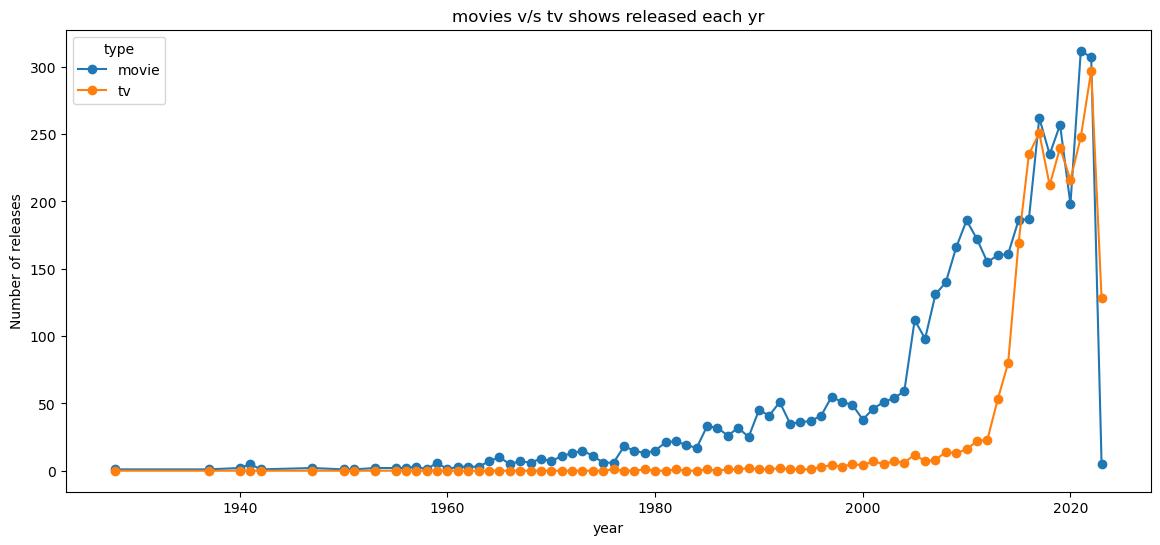

In [29]:
pivot_table=grouped.pivot(index='year',columns='type', values='count').fillna(0)
pivot_table.plot(kind='line', figsize=(14,6), marker='o')
plt.title("movies v/s tv shows released each yr")
plt.xlabel('year')
plt.ylabel('Number of releases')


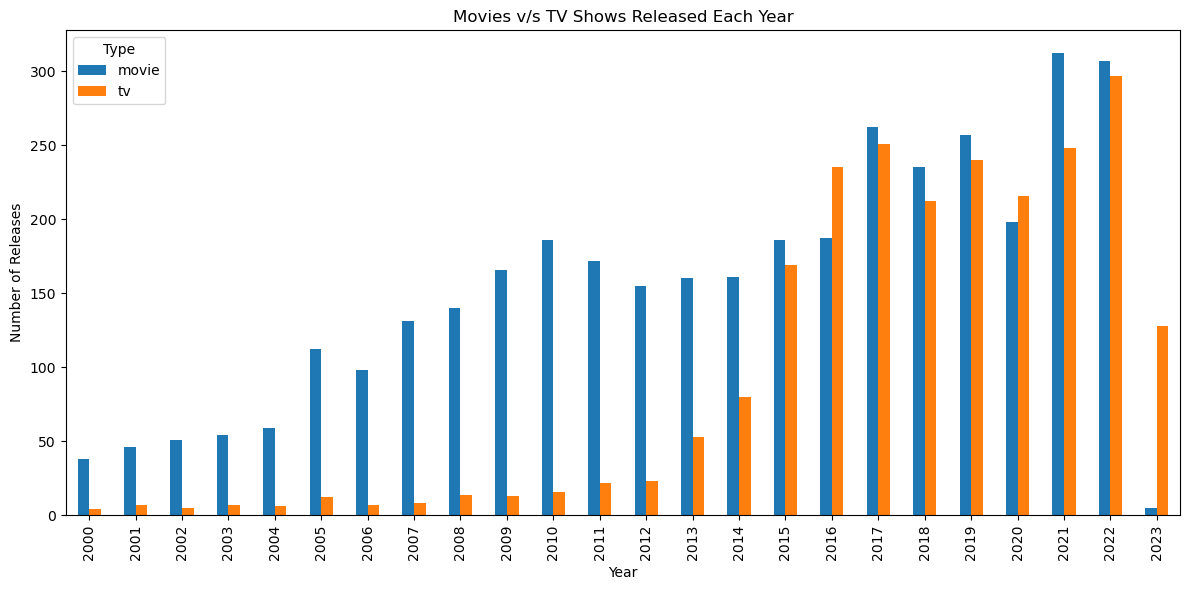

In [30]:
#for last two decades
recent = pivot_table.loc[2000:2023]
recent.plot(kind='bar',figsize=(12,6))
plt.title('Movies v/s TV Shows Released Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Releases')
plt.xticks(rotation=90)
plt.legend(title='Type')
plt.tight_layout()
plt.show()

Conclusion:- in the mid years the the popularity of movies were more than the tv shows . Later on the  the number of release of the tv shows reached approximately same to that of the number of the movies. But in the year 2023 a drastic change was seen as the no. of movies were much lesser than what compared to the tv shows indicating the change in the trend.

## Top 10 genre for last two decades

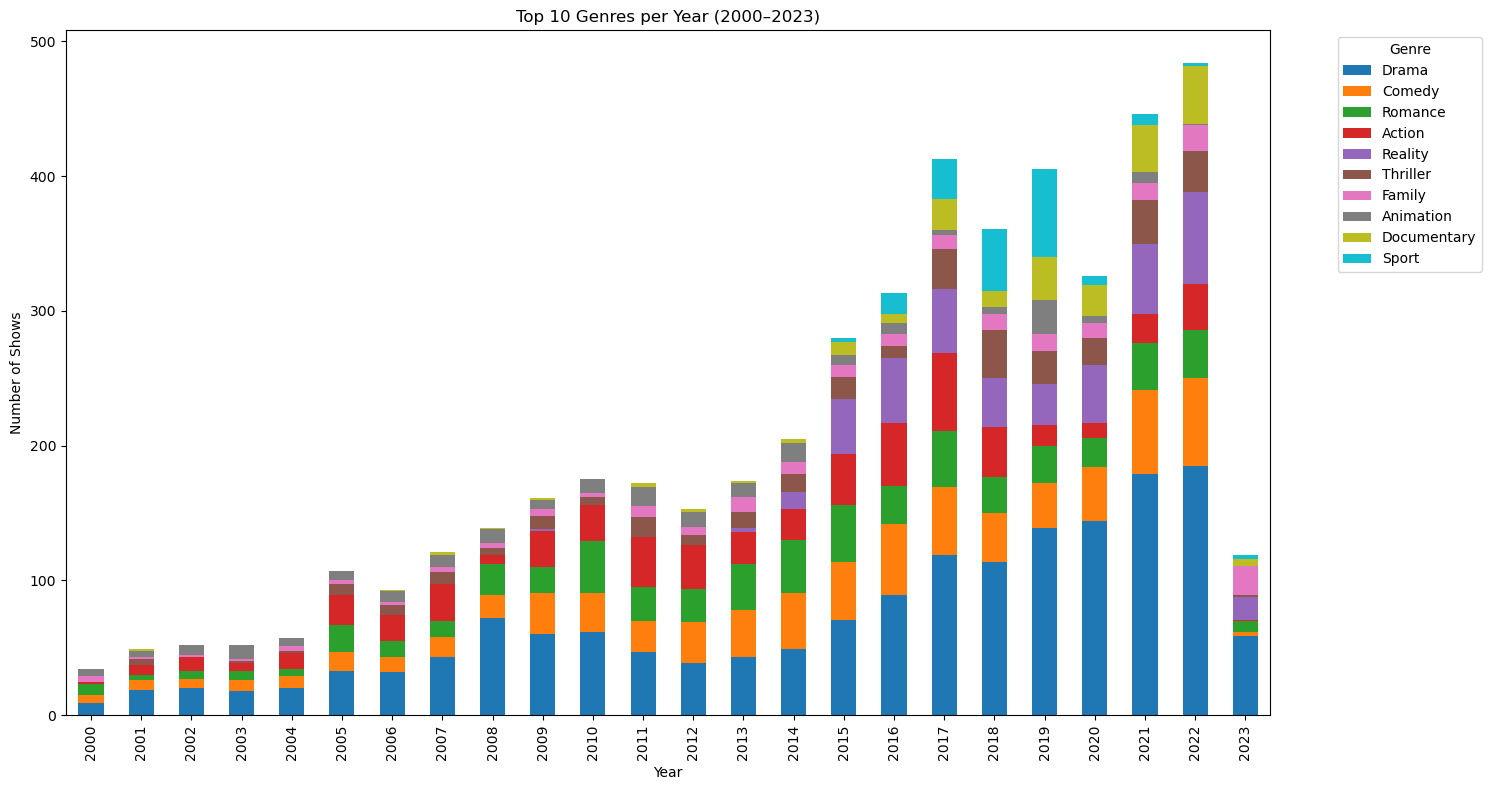

In [31]:
genre_group=df.groupby(['year','genre']).size().reset_index(name="count")
genre_pivot=genre_group.pivot(index="year", columns="genre", values="count").fillna(0)
genre_recent=genre_pivot.loc[2000:2023]
top_genre=genre_pivot.sum().sort_values(ascending=False).head(10).index
genre_top_recent=genre_recent[top_genre].fillna(0)
genre_top_recent.plot(kind="bar", stacked=True, figsize=(15,8), colormap="tab10")
plt.title('Top 10 Genres per Year (2000–2023)')
plt.xlabel('Year')
plt.ylabel('Number of Shows')
plt.xticks(rotation=90)
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## Genre common for movies vs TV shows

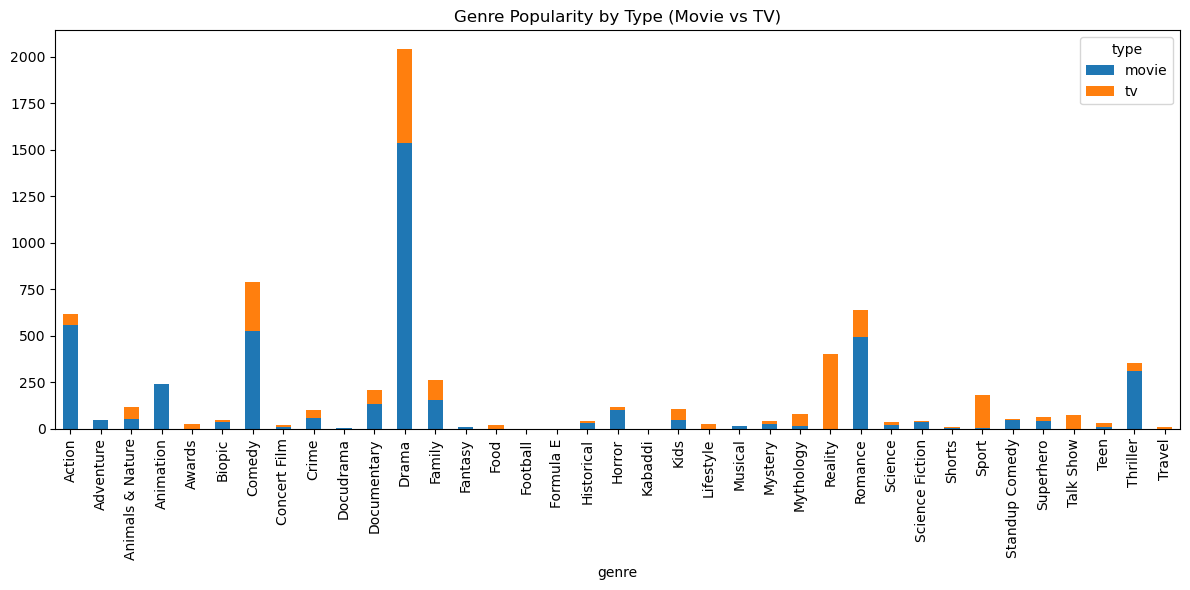

In [32]:
group_ty= df.groupby(["genre","type"]).size().reset_index(name="count")
ty_pivot=group_ty.pivot(index="genre", columns="type", values="count").fillna(0)
ty_pivot.plot(kind="bar", stacked=True, figsize=(12,6) )
plt.xticks(rotation=90)
plt.title('Genre Popularity by Type (Movie vs TV)')
plt.tight_layout()
plt.show()

## Genre vs age_rating

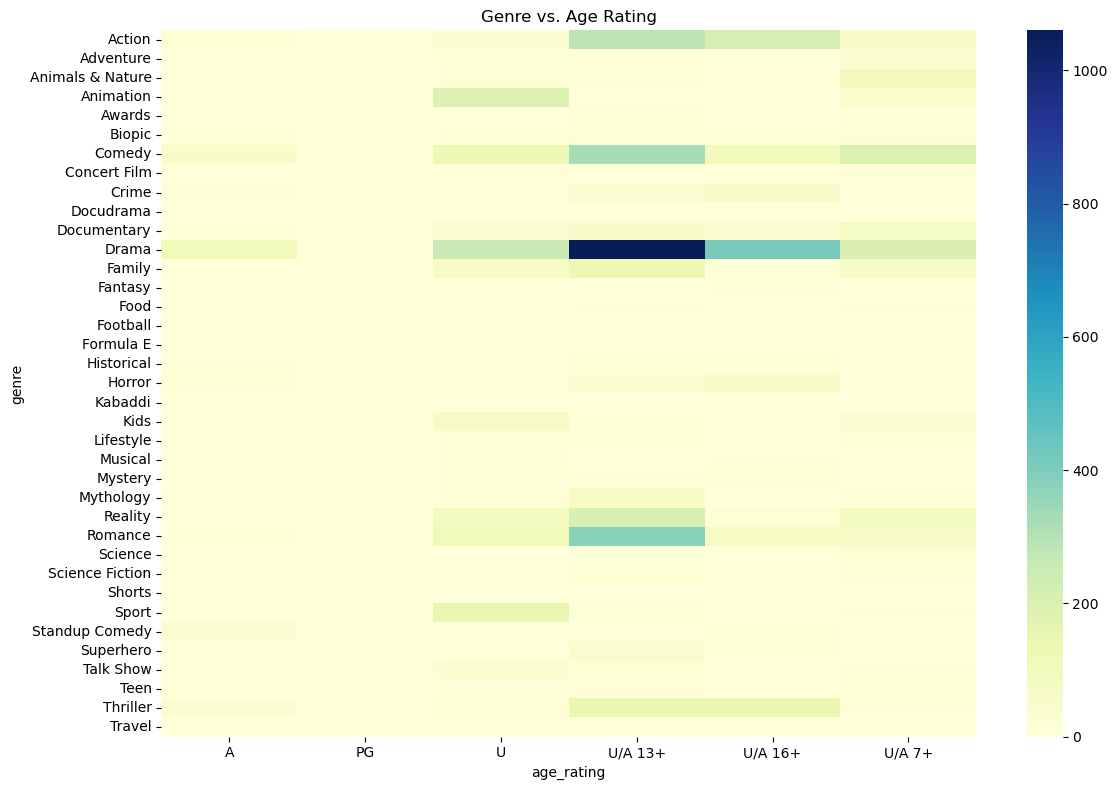

In [33]:
age_rating= df.groupby(["genre","age_rating"]).size().unstack().fillna(0)
plt.figure(figsize=(12,8))
sns.heatmap(age_rating, annot=False, cmap='YlGnBu')
plt.title('Genre vs. Age Rating')
plt.tight_layout()
plt.show()



## Volume of content over time

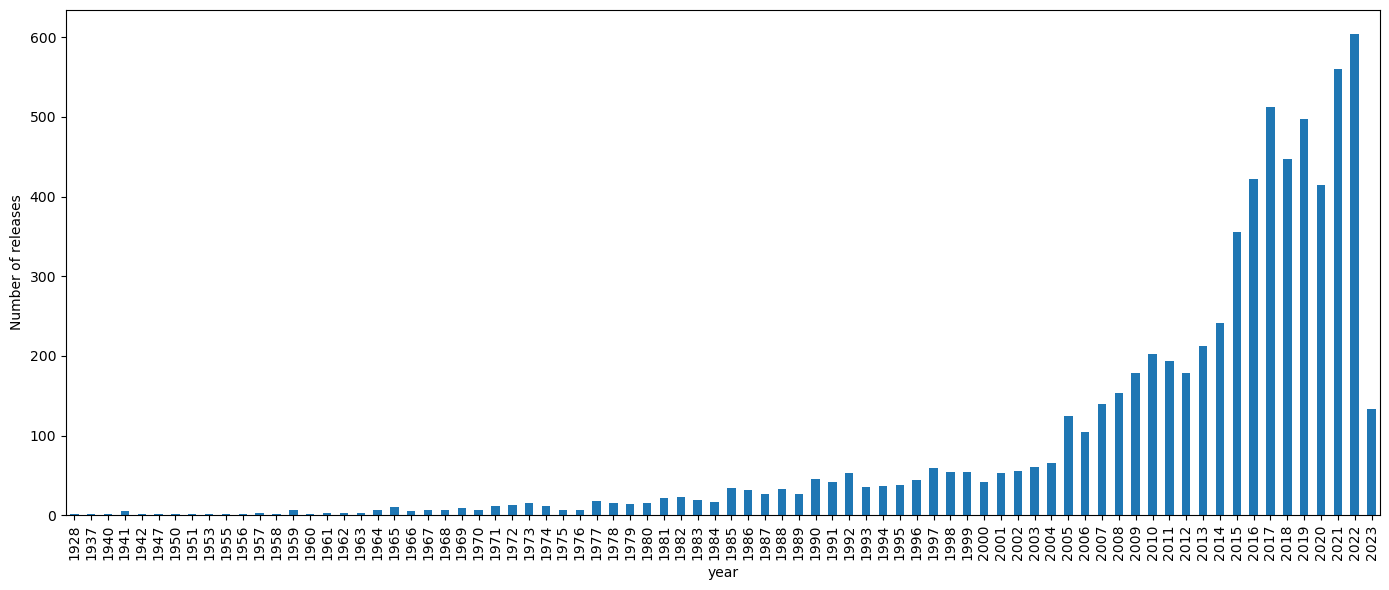

In [34]:
vol_con= df.groupby(["year"]).size().fillna(0)
vol_con.plot(kind="bar", figsize=(14,6))
plt.ylabel("Number of releases")
plt.tight_layout()
plt.show()

## Targeted analysis for TV content

In [35]:
#average number of episodes in each genre
df_tv.groupby("genre")['episodes'].mean()

genre
Action               37.350000
Adventure            27.750000
Animals & Nature      6.588235
Animation            19.000000
Awards                9.250000
Biopic               75.777778
Comedy               61.705660
Concert Film         10.900000
Crime               150.651163
Docudrama             6.333333
Documentary          11.739726
Drama               244.623506
Family              406.605505
Fantasy               9.000000
Food                 55.894737
Football             12.000000
Formula E             6.000000
Historical          224.800000
Horror               69.500000
Kabaddi               7.000000
Kids                 48.559322
Lifestyle           289.708333
Musical               7.000000
Mystery              45.000000
Mythology           204.378788
Reality              39.478803
Romance             279.006757
Science              28.714286
Science Fiction      22.333333
Shorts                5.166667
Sport                14.175141
Standup Comedy        6.000000
Su

In [36]:
#average number of seasons in each genre
df_tv.groupby("genre")["seasons"].mean()

genre
Action              2.000000
Adventure           1.750000
Animals & Nature    1.279412
Animation           1.500000
Awards              2.607143
Biopic              1.000000
Comedy              2.411321
Concert Film        1.100000
Crime               5.046512
Docudrama           1.333333
Documentary         1.205479
Drama               3.181275
Family              5.532110
Fantasy             1.000000
Food                1.473684
Football            1.000000
Formula E           1.000000
Historical          1.000000
Horror              2.250000
Kabaddi             1.000000
Kids                1.966102
Lifestyle           4.708333
Musical             1.000000
Mystery             1.214286
Mythology           4.030303
Reality             1.643392
Romance             5.594595
Science             2.214286
Science Fiction     2.000000
Shorts              1.000000
Sport               1.158192
Standup Comedy      1.000000
Superhero           1.500000
Talk Show           1.847222
Teen    

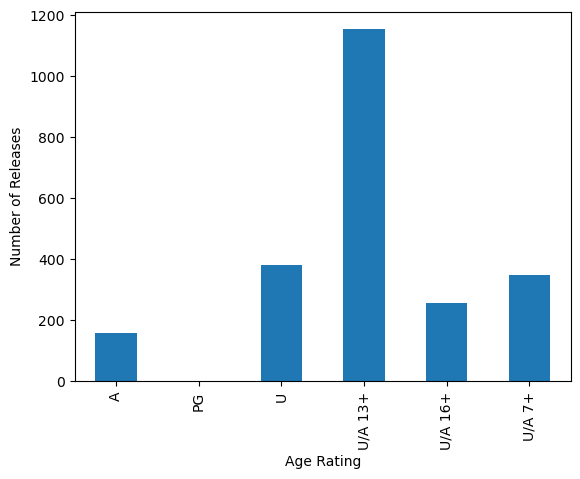

<Figure size 1200x600 with 0 Axes>

In [44]:
#number of release for each age_rating
tv=df_tv.groupby("age_rating").size().fillna(0)
tv.plot(kind="bar")
plt.xlabel("Age Rating")
plt.ylabel("Number of Releases")
plt.figure(figsize=(12,6))
plt.tight_layout()
plt.show()

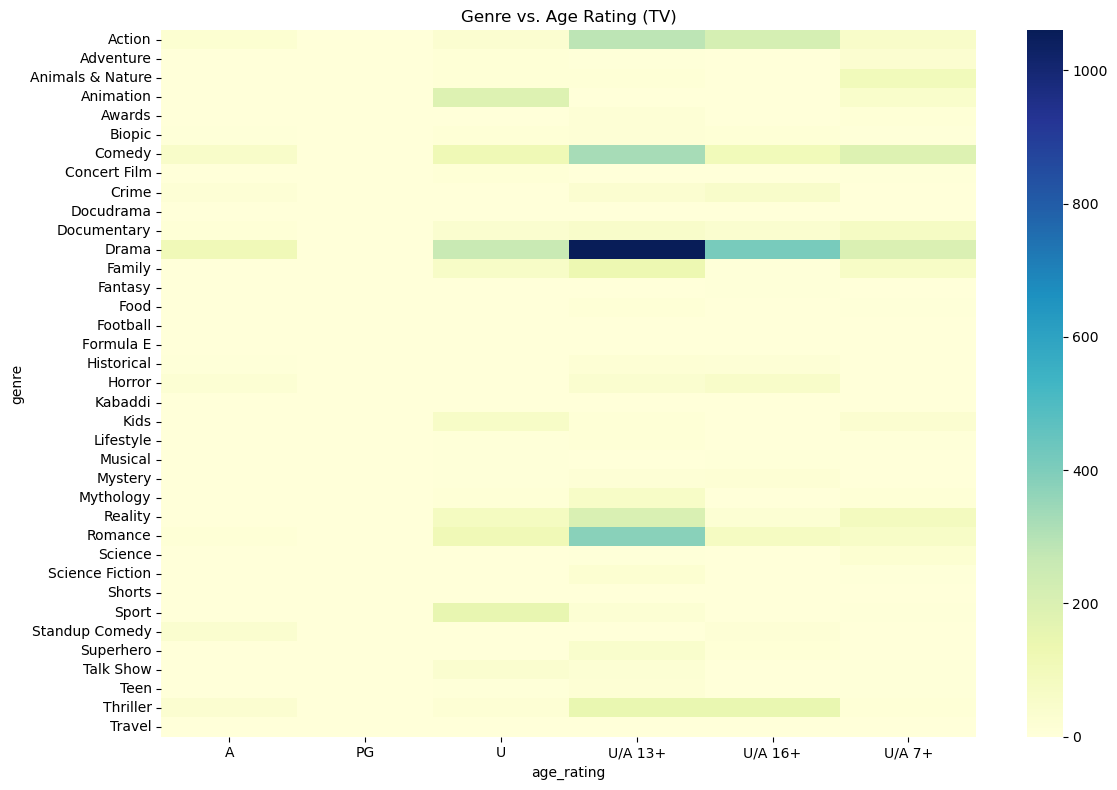

In [38]:
age_rating_tv= df_tv.groupby(["genre","age_rating"]).size().unstack().fillna(0)
plt.figure(figsize=(12,8))
sns.heatmap(age_rating, annot=False, cmap='YlGnBu')
plt.title('Genre vs. Age Rating (TV)')
plt.tight_layout()
plt.show()

## Targeted analysis for movie content

In [39]:
#average running time for each genre
df_mov.groupby("genre")["running_time"].mean()

genre
Action              130.477477
Adventure            94.200000
Animals & Nature     50.549020
Animation            63.382353
Biopic              130.736842
Comedy              110.769962
Concert Film        102.750000
Crime                96.214286
Docudrama            51.000000
Documentary          59.425373
Drama                89.128088
Family              105.616883
Fantasy             109.571429
Food                 42.000000
Historical          118.531250
Horror               84.470588
Kids                 90.311111
Musical              99.133333
Mystery              98.821429
Mythology           128.933333
Romance             115.599593
Science              38.350000
Science Fiction     108.394737
Shorts                6.750000
Sport               145.500000
Standup Comedy       61.612245
Superhero           125.931818
Talk Show           124.000000
Teen                 86.636364
Thriller             95.795455
Travel               18.000000
Name: running_time, dtype: float6

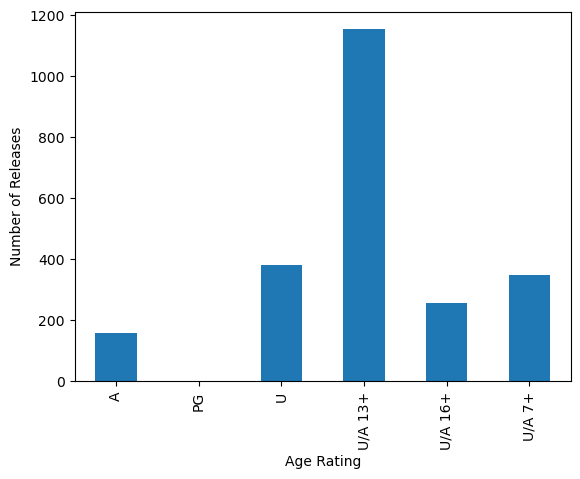

<Figure size 1200x600 with 0 Axes>

In [45]:
#number of release for each age_rating
mov=df_mov.groupby("age_rating").size().fillna(0)
tv.plot(kind="bar")
plt.xlabel("Age Rating")
plt.ylabel("Number of Releases")
plt.figure(figsize=(12,6))
plt.tight_layout()
plt.show()

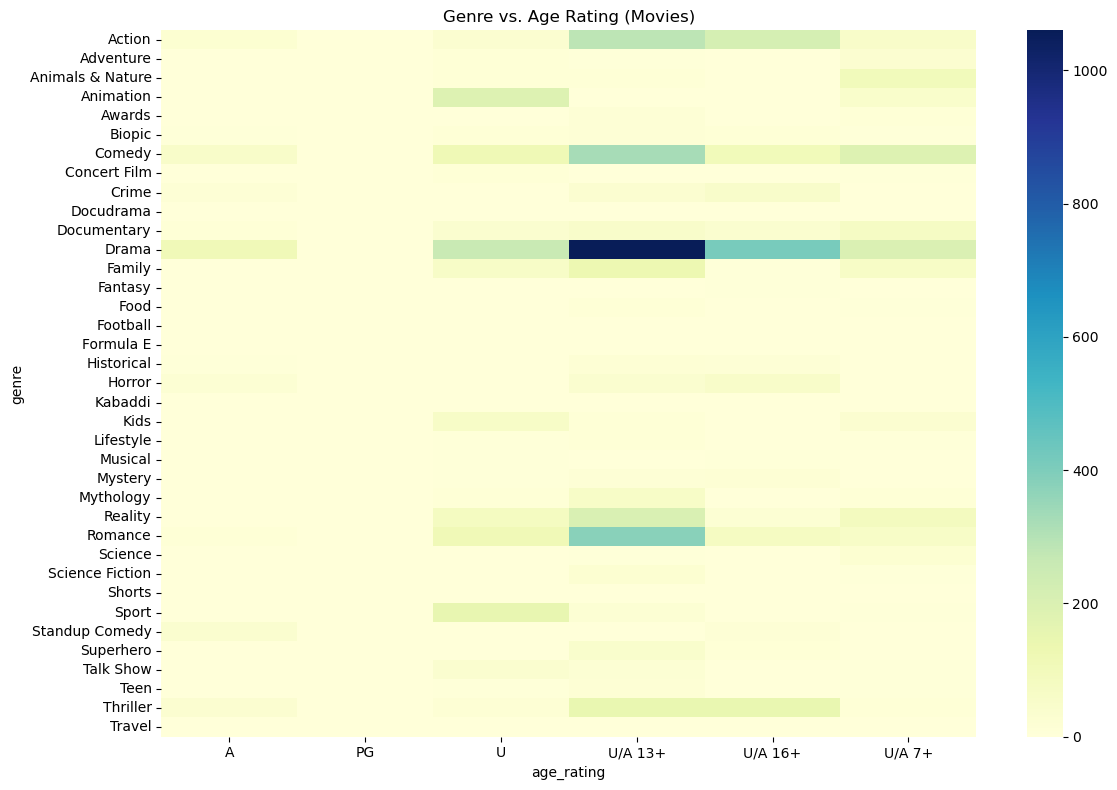

In [41]:
#genre vs age rating
age_rating_mov= df_mov.groupby(["genre","age_rating"]).size().unstack().fillna(0)
plt.figure(figsize=(12,8))
sns.heatmap(age_rating, annot=False, cmap='YlGnBu')
plt.title('Genre vs. Age Rating (Movies)')
plt.tight_layout()
plt.show()                